In [5]:
import time
import cv2 as cv
import numpy as np
from queue import Queue
# from skimage import util
# from skimage import io
# import skimage
import matplotlib.pyplot as plt

#Original Image matrix
img = np.array([[1, 0, 4, 7, 5],
               [1, 0, 4, 7, 7],
               [0, 1, 5, 5, 5],
               [2, 0, 5, 6, 5],
               [2, 2, 5, 6, 4]],dtype = 'uint8'
)

T = 0
while (T < 3):
    T += 1
    #Init some insistant list and queue
    q = Queue()
    areas = []#store every area
    tmp = []#store each area temporarily
    tag = np.zeros([5,5] ,dtype = bool)
    
    #Using BFS to do simple region growing
    #Found the pixel that belongs to nothing
    for index in range(img.shape[0] * img.shape[1]):
        row = index // img.shape[0]
        col = index % img.shape[1]
        if (tag[row, col] == False):
            tag[row, col] = True
            tmp.append((row, col))
            q.put((row, col))
        else:
            continue
        
        #8-neighbor region
        #devide areas, add the pixel into area if it satisfies the condition
        while (q.empty() == False):
            rowtmp, coltmp = q.get()
            for near_row in range(max(0, rowtmp - 1), min(rowtmp + 2, img.shape[0])):
                for near_col in range(max(0, coltmp - 1), min(coltmp + 2, img.shape[1])):
                    if (tag[near_row, near_col] == False and abs(int(img[rowtmp, coltmp]) - int(img[near_row, near_col])) <= T):
                        tag[near_row, near_col] = True
                        tmp.append((near_row, near_col))
                        q.put((near_row, near_col))
        areas.append(tmp.copy())
        tmp.clear()
        
    #Output the rusult of each different T
    print("When T = %d:" % T)
    for i in range(len(areas)):
        print("Area %d: " % (i + 1), areas[i], sep = "")
    print("")

When T = 1:
Area 1: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 1), (3, 0), (4, 0), (4, 1)]
Area 2: [(0, 2), (1, 2), (2, 2), (2, 3), (3, 2), (3, 3), (2, 4), (3, 4), (4, 2), (4, 3), (4, 4)]
Area 3: [(0, 3), (1, 3), (1, 4)]
Area 4: [(0, 4)]

When T = 2:
Area 1: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1)]
Area 2: [(0, 2), (1, 2), (2, 2), (2, 3), (1, 3), (3, 2), (3, 3), (1, 4), (2, 4), (3, 4), (0, 3), (0, 4), (4, 2), (4, 3), (4, 4)]

When T = 3:
Area 1: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (1, 2), (4, 0), (4, 1), (0, 2), (0, 3), (1, 3), (2, 2), (2, 3), (3, 2), (4, 2), (0, 4), (1, 4), (2, 4), (3, 3), (3, 4), (4, 3), (4, 4)]



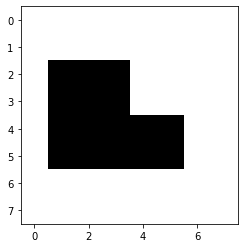

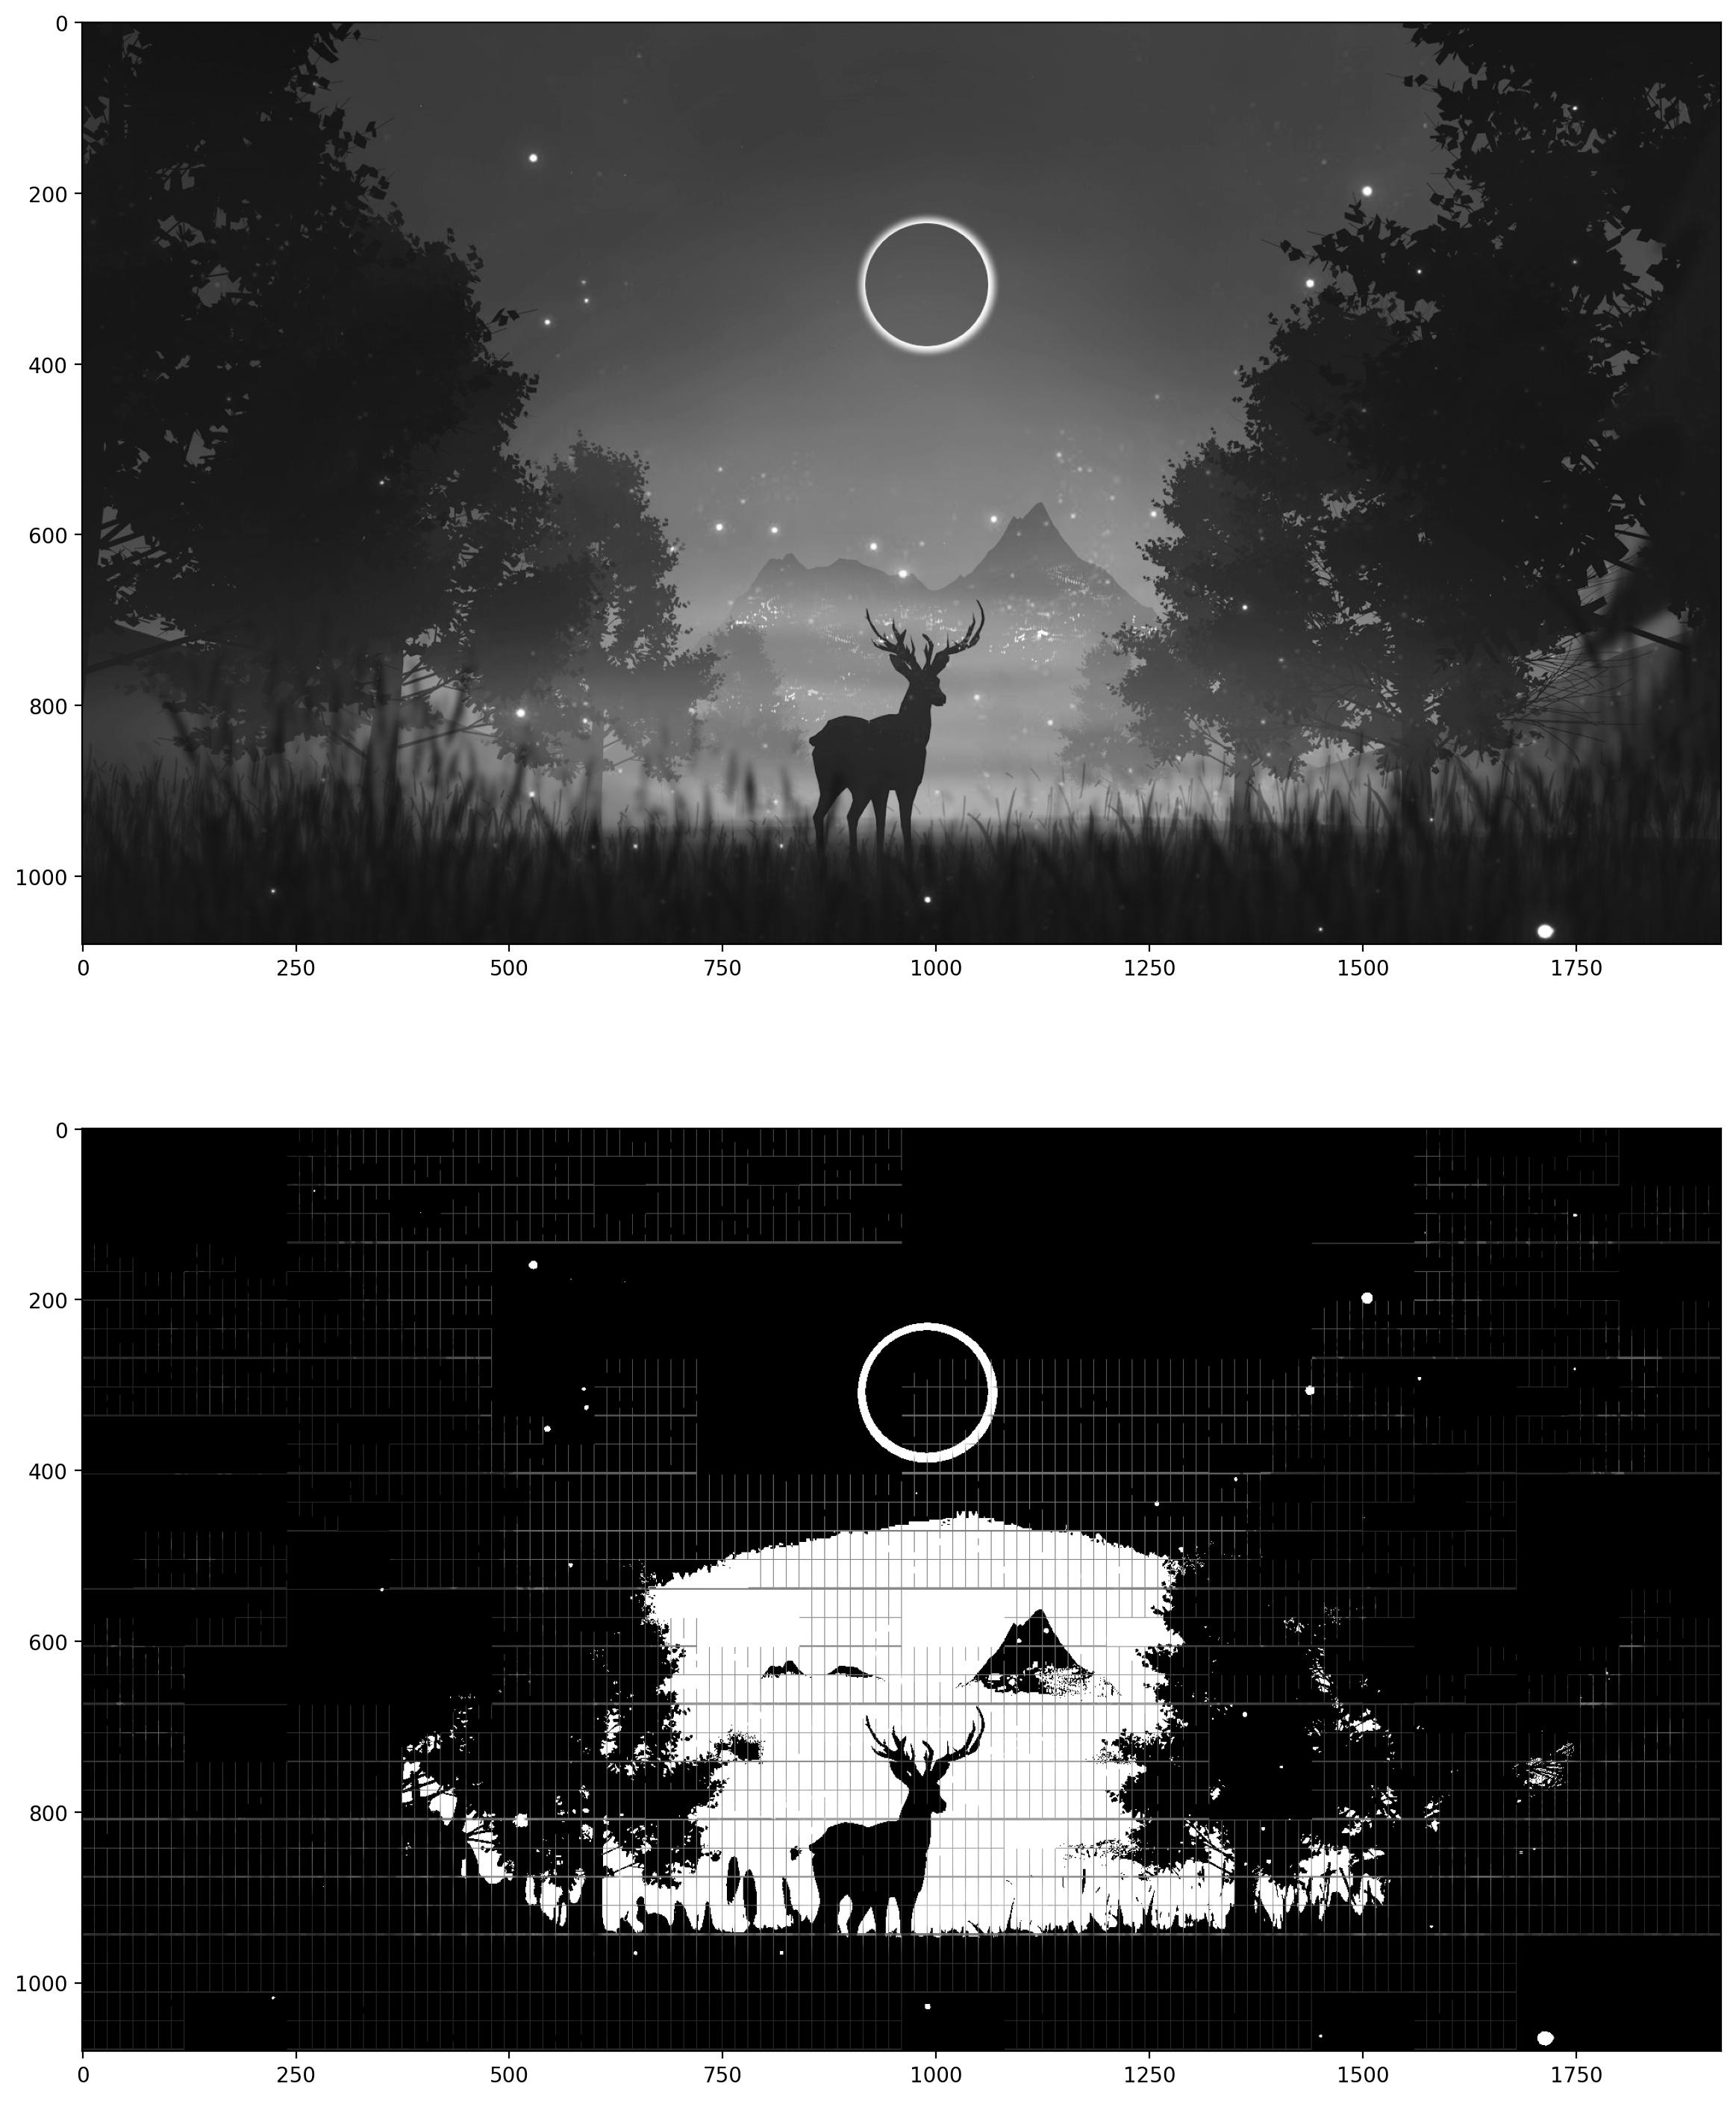

In [31]:
# img2 = np.zeros([8, 8], dtype = 'uint8')
# img2[...] = 255
# img2[2:6, 1:4] = 0
# img2[4:6, 4:6] = 0
img2 = cv.imread("C:\\Users\\XRUI\\Desktop\\Pictures\\Wallpapers\\21.jpg", cv.IMREAD_GRAYSCALE)
img2_input = img2.copy()#备份
height, width = img2.shape

#判断方框是否需要再次拆分为四个
def judge(w0, h0, w, h):
    a = img2[h0: h0 + h, w0: w0 + w]
    ave = np.mean(a)
    std = np.std(a, ddof=1)
    count = 0
    total = 0
    for i in range(w0, w0 + w):
        for j in range(h0, h0 + h):
        #注意！我输入的图片数灰度图，所以直接用的img[j,i]，RGB图像的话每个img像素是一个三维向量，不能直接与avg进行比较大小。
            if abs(img2[j, i] - ave) < 1 * std:
                count += 1
            total += 1
    if (count / total) < 0.95:#合适的点还是比较少，接着拆
        return True
    else:
        return False

##将图像将根据阈值二值化处理，在此默认125
def draw(w0, h0, w, h):
    for i in range(w0, w0 + w):
        for j in range(h0, h0 + h):
            if img2[j, i] > 125:
                img2[j, i] = 255
            else:
                img2[j, i] = 0


def function(w0, h0, w, h):
    if judge(w0, h0, w, h) and (min(w, h) > 5):
        function(w0, h0, int(w / 2), int(h / 2))
        function(w0 + int(w / 2), h0, int(w / 2), int(h / 2))
        function(w0, h0 + int(h / 2), int(w / 2), int(h / 2))
        function(w0 + int(w / 2), h0 + int(h / 2), int(w / 2), int(h / 2))
    else:
        draw(w0, h0, w, h)

##############################################
######################main_##################
###############################################
function(0, 0, width, height)


plt.figure(figsize = (16, 18),dpi = 200)
plt.subplot(211)
plt.imshow(img2_input, 'gray')
plt.subplot(212)
plt.imshow(img2, 'gray')
plt.show()

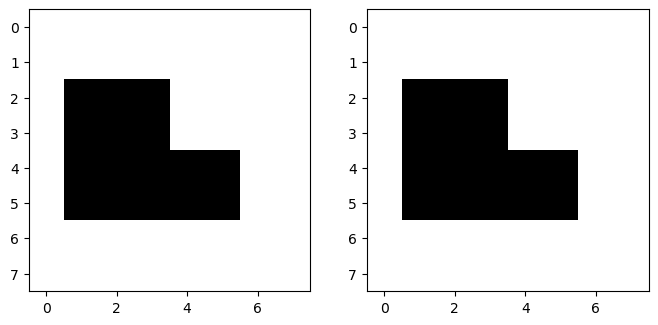

In [36]:
img2 = np.zeros([8, 8], dtype = 'uint8')
img2[...] = 255
img2[2:6, 1:4] = 0
img2[4:6, 4:6] = 0
img2_input = img2.copy()#备份
height, width = img2.shape

function(0, 0, width, height)


#作业的分割图像
plt.figure(figsize = (8,4),dpi = 100)
plt.subplot(121)
plt.imshow(img2_input, 'gray')
plt.subplot(122)
plt.imshow(img2, 'gray')
plt.show()